In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('zbior_23.csv',encoding = 'utf8',sep=';')
X = df[['M_C', 'M_A', 'SYM', 'P', 'T']].values
y = df[['EXP U']].values

In [4]:
'''Przygotowanie danych - podzielenie danych na zbiór trenujacy i testowy'''

X_train, X_test, y_train, y_test = train_test_split(
X,y,test_size = 0.4, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print('Test shapes')
print(X_test.shape)
print(y_test.shape)

(1719, 5)
(1719, 1)
Test shapes
(1146, 5)
(1146, 1)


In [5]:
# Skalowanie cech dla lepszej wydajności modelu lasu losowego
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [7]:
# Tworzenie i trenowanie modelu Lasu Losowego
random_forest_model = RandomForestRegressor(n_estimators=10, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [8]:
y_test_rf = random_forest_model.predict(X_test)

In [9]:
y_test_rf

array([1251.458, 1509.165, 1475.327, ..., 1493.916, 1502.08 , 1503.82 ])

In [10]:
r2 = r2_score(y_test, y_test_rf)
print(f"Współczynnik determinacji R^2: {r2}")
mse = mean_squared_error(y_test, y_test_rf)
print(f"Błąd średniokwadratowy MSE: {mse}")

Współczynnik determinacji R^2: 0.9858658724826729
Błąd średniokwadratowy MSE: 464.27820947927415


In [11]:
###Metryki błędu dla zbioru treningowego
y_train_rf =random_forest_model.predict(X_train)
r2_train = r2_score(y_train, y_train_rf)
print(f"Współczynnik determinacji R^2: {r2_train}")
mse_train = mean_squared_error(y_train, y_train_rf)
print(f"Błąd średniokwadratowy MSE: {mse_train}")

Współczynnik determinacji R^2: 0.9970027613006969
Błąd średniokwadratowy MSE: 106.55512090599251


# Walidacja krzyżowa

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
# Przeprowadź walidację krzyżową z 5 foldami i oblicz R^2 jakość modelu
cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=15, scoring='r2')

In [14]:
# Oblicz średnią wartość R^2 po wszystkich foldach
mean_r2 = cv_scores.mean()

In [15]:
print("Średni R^2 po walidacji krzyżowej:", mean_r2)

Średni R^2 po walidacji krzyżowej: 0.9857657738626646


In [16]:
# Przeprowadź walidację krzyżową z 5 foldami i oblicz R^2 jakość modelu
cv_scores_test = cross_val_score(random_forest_model, X_test, y_test, cv=25, scoring='r2')
# Oblicz średnią wartość R^2 po wszystkich foldach
mean_r2_test = cv_scores_test.mean()
print("Średni R^2 po walidacji krzyżowej:", mean_r2_test)

Średni R^2 po walidacji krzyżowej: 0.9823941091823943


# Wykresy R2

In [17]:
test_predictions_rf = pd.Series(y_test_rf)
pred_df = pd.DataFrame(y_test,columns = ['Test TRUE Y'])
pred_df = pd.concat([pred_df,test_predictions_rf],axis = 1)
pred_df.columns = ['Test true y', 'Pred']

In [18]:
train_predictions_rf = pd.Series(y_train_rf)
train_df = pd.DataFrame(y_train,columns = ['Test TRUE Y'])
train_df = pd.concat([train_df,train_predictions_rf],axis = 1)
train_df.columns = ['Test true y', 'Pred']

<Axes: xlabel='Test true y', ylabel='Pred'>

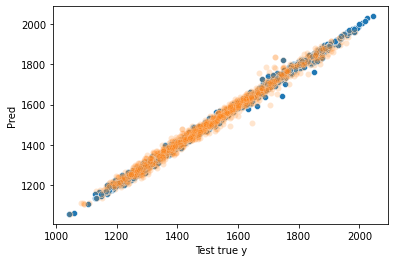

In [19]:
sns.scatterplot(x = 'Test true y', y = 'Pred', data = train_df)
sns.scatterplot(x = 'Test true y', y = 'Pred', data = pred_df, alpha = 0.2)

In [20]:
train_df

,Test true y,Pred
0,1613.37,1607.951
1,1314.90,1329.330
2,1800.81,1804.499
3,1267.31,1262.545
4,1582.90,1585.350
...,...,...
1714,1377.30,1365.329
1715,1360.43,1366.990
1716,1246.87,1247.890
1717,1557.03,1558.477


In [21]:
pred_df

,Test true y,Pred
0,1252.40,1251.458
1,1525.30,1509.165
2,1481.59,1475.327
3,1410.40,1379.020
4,1537.50,1538.632
...,...,...
1141,1485.86,1498.816
1142,1309.19,1316.880
1143,1471.30,1493.916
1144,1485.40,1502.080


# Zapis do pliku zbioru testowego i treningowego

In [22]:
import os
directory_path = 'D:/PhD/ML/RF/U'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
# train_df.to_csv(os.path.join(directory_path, 'train_set_RF_U.csv'), sep=';', encoding='utf-8')
# pred_df.to_csv(os.path.join(directory_path, 'test_set_RF_U.csv'), sep=';', encoding='utf-8') 

# Schemat obliczeń dla konkretnej cieczy jonowej

In [23]:
def predictions3(MC,MA,SYM,P,T):
    res = []
    for j in T:
        for i in P:
            new_geom = [[MC,MA,SYM,i,j]]
            new_geom = scaler.transform(new_geom)
            res.append(random_forest_model.predict(new_geom))
            #print(model.predict(new_geom))
    return res

In [24]:
nazwa = 'S222_NTF2'
Mcat = 119.24
Man = 280.146

P = [0.1,5,10,20,30,40,50,60,70,80,90,95]
T = [283.15,293.15,303.15,313.15,323.15,333.15,343.15]
result = predictions3(Mcat,Man,0,P,T);

In [25]:
res_flat = np.array(result).flatten()  # przekształcenie do jednowymiarowej tablicy numpy
res_numerical = [val.item() for val in res_flat]  # wyodrębnienie wartości liczbowych
for i in res_numerical:
    print(i)

1282.415
1294.2599999999998
1339.569
1355.549
1376.26
1410.528
1430.2679999999998
1460.3
1467.35
1488.8100000000002
1519.0350000000003
1529.1680000000001
1273.3519999999999
1273.4929999999997
1293.038
1313.3799999999999
1355.128
1374.0279999999998
1404.775
1432.891
1454.4959999999999
1476.5600000000002
1503.4950000000001
1513.5700000000002
1241.364
1250.364
1280.078
1304.3250000000003
1338.828
1361.8210000000001
1394.4489999999998
1418.376
1443.9660000000001
1464.382
1482.523
1494.68
1223.4550000000002
1231.0889999999997
1251.578
1287.0679999999998
1317.5700000000002
1349.9810000000002
1367.717
1396.734
1421.5489999999998
1443.6899999999998
1459.685
1477.826
1218.7345
1209.1909999999998
1232.2910000000002
1257.1040000000003
1290.51
1335.924
1351.806
1373.9000000000003
1411.541
1425.0010000000002
1451.075
1454.9309999999998
1187.751
1210.8
1216.944
1254.368
1276.8799999999999
1300.5480000000002
1331.6770000000001
1371.71
1385.255
1412.511
1429.313
1436.5130000000001
1154.2199999999998
1

In [26]:
import os
directory_path = 'D:/PhD/ML/RF/U/'
directory_path + nazwa 
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
tablica_danych = np.array(res_numerical).reshape(len(T), len(P))
dane = pd.DataFrame(tablica_danych)
dane = dane.T
dane.to_excel(directory_path+nazwa+'_U_DATA_RF.xlsx', index=False)